# **- Fake news detection**


Dataset's official link- https://www.uvic.ca/ecs/ece/isot/datasets/fake-news/index.php <br>
Algorithmic comparison - Logistic regression, Random Forest, Naive Bayes, Decision Tree, SVM



## Importing the required libraries

In [ ]:
#dataset handling and operations 
import re,string,unicodedata
import numpy as np 
import pandas as pd

#visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('bmh')
from wordcloud import WordCloud, STOPWORDS 

#nlp pre-processing
from sklearn.utils import shuffle
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import wordnet 

#vectorizers and splitting
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

#models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm,naive_bayes


#metrics 
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import plot_confusion_matrix,precision_score,f1_score,recall_score



In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

## Reading the input CSV files

In [ ]:
fake_df = pd.read_csv('Fake.csv')
true_df = pd.read_csv('True.csv')

In [ ]:
fake_df.shape

(23481, 4)

In [ ]:
true_df.shape

(21417, 4)

In [ ]:
fake_df.sample(5)

,title,text,subject,date
5469,"Trump, Fox News Push ‘World War’ After Attack...",Fox News Channel host Bill O Reilly and Republ...,News,"July 14, 2016"
4520,Congressional Black Caucus Member Depicts Lis...,A senior member of the Congressional Black Cau...,News,"September 22, 2016"
17100,Great Video! Muslim Invasion Of The West In Pr...,If you haven t been paying attention then you ...,Government News,"Sep 14, 2015"
497,"REPORT: Mueller Hot On Trump’s Trail, Has Bui...",Donald Trump is very afraid of Special Counsel...,News,"August 25, 2017"
3238,Bristol Palin Throws MASSIVE Hissy Fit Becaus...,"Apparently, Bristol Palin thinks musicians hav...",News,"December 29, 2016"


In [ ]:
true_df.sample(5)

,title,text,subject,date
12919,"Extremism stems from repressive states, not We...",LONDON (Reuters) - Repressive states are to bl...,worldnews,"December 7, 2017"
15546,Colombian president says he left firm listed i...,BOGOTA (Reuters) - Colombian President Juan Ma...,worldnews,"November 6, 2017"
4773,Key conservative U.S. lawmaker says making hea...,WASHINGTON (Reuters) - U.S. Representative Mar...,politicsNews,"March 22, 2017"
11464,Peru opposition leader skeptical president's v...,LIMA (Reuters) - Peruvian President Pedro Pabl...,worldnews,"December 23, 2017"
13289,Middle East leaders paint 'dark picture' at Ro...,ROME (Reuters) - When Italy organized a confer...,worldnews,"December 2, 2017"


## Checking for null values

In [ ]:
fake_df.isna().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [ ]:
true_df.isna().sum()

title      0
text       0
subject    0
date       0
dtype: int64

## Dropping the unrequired columns 

In [ ]:
fake_df.drop(['subject','date'],axis=1,inplace=True)

In [ ]:
true_df.drop(['subject','date'],axis=1,inplace=True)

## Checking the distribution of fake news vs true news

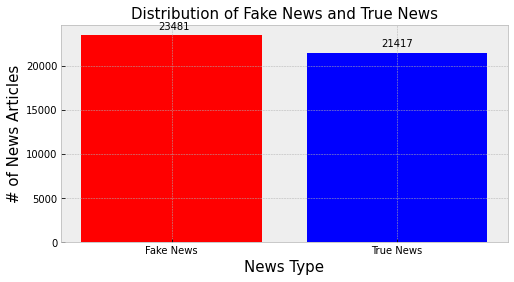

In [ ]:
plt.figure(figsize=(8, 4))
plt.bar('Fake News', len(fake_df), color='red')
plt.bar('True News', len(true_df), color='blue')
plt.title('Distribution of Fake News and True News', size=15)
plt.xlabel('News Type', size=15)
plt.ylabel('# of News Articles', size=15)
plt.annotate(len(fake_df), # this is the text
                (0.01,23000), # these are the coordinates to position the label
                textcoords="offset points", # how to position the text
                xytext=(0,10), # distance from text to points (x,y)
                ha='center')
plt.annotate(len(true_df), # this is the text
                (1,21000), # these are the coordinates to position the label
                textcoords="offset points", # how to position the text
                xytext=(0,10), # distance from text to points (x,y)
                ha='center')
plt.show()

## Concatenating the title and text columns

In [ ]:
fake_df['news'] = fake_df['title'] + fake_df['text']
fake_df['label'] = 0
fake_df.drop(['title','text'], axis=1, inplace=True)

In [ ]:
true_df['news'] = true_df['title'] + true_df['text']
true_df['label'] = 1
true_df.drop(['title','text'], axis=1, inplace=True)

In [ ]:
fake_df.sample(2)

,news,label
19151,LOL! HIGH SCHOOL STUDENTS Skip School To Prote...,0
8251,This State Is About To Let Guns Have More Rig...,0


In [ ]:
true_df.sample(2)

,news,label
20148,Mauritius attorney general steps down amid mon...,1
10272,Ex-Connecticut Governor Rowland appeals convic...,1


## Visualizing the news using wordcloud

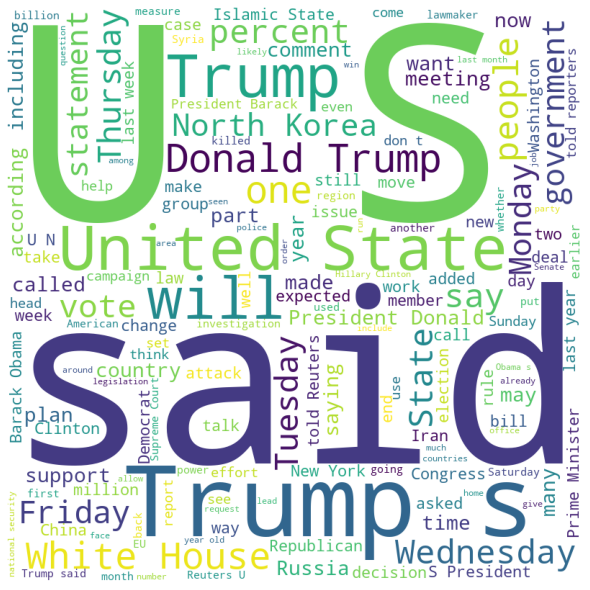

In [ ]:
stopwords = set(STOPWORDS) 

words_li_true = list(true_df['news'])
string_of_words_true = " ".join(words_li_true)

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(string_of_words_true) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

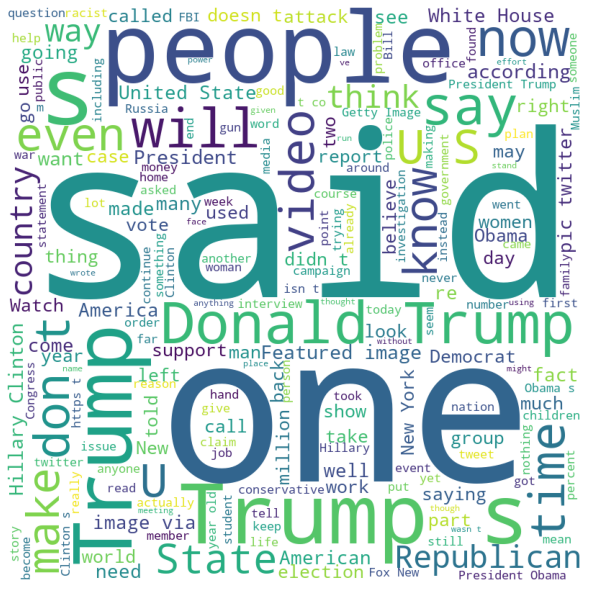

In [ ]:
words_li_fake = list(fake_df['news'])
string_of_words_fake = " ".join(words_li_fake)

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(string_of_words_fake) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

## Concatenating the true and fake news datasets

In [ ]:
df = pd.concat([fake_df, true_df], ignore_index=True, sort=False)

In [ ]:
df.sample(5)

,news,label
29502,Mexican official widens tax-dodge complaint ag...,1
18080,TWISTED LIBERAL KINDERGARTEN Teacher Allows Tr...,0
8689,"Oregon Militant Flips Over His Vehicle, Break...",0
11186,BREAKING: PUTIN Makes Aggressive Military Move...,0
21471,"IN A RULING THAT WILL MAKE OBAMA’S HEAD SPIN, ...",0


## Using NLP to pre-process the news text

In [ ]:
stop_words = nltk.corpus.stopwords.words('english')

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
lemmatizer=WordNetLemmatizer()
for index,row in df.iterrows():
    filter_sentence = ''
    
    sentence = row['news']
    sentence = re.sub(r'[^\w\s]','',sentence) #cleaning
    
    words = nltk.word_tokenize(sentence) #tokenization
    
    words = [w for w in words if not w in stop_words]  #stopwords removal
    
    for word in words:
        filter_sentence = filter_sentence + ' ' + str(lemmatizer.lemmatize(word)).lower() 
        
    df.loc[index,'news'] = filter_sentence

In [ ]:
df.sample(5)

,news,label
5561,family values eric trump says his sister is h...,0
39133,excatalonia leader turn belgian police vrtbru...,1
28829,trump administration draft plan raise asylum ...,1
36642,lebanons hariri meet major power parisparis r...,1
1241,fmr dni james clapper trumps russia scandal i...,0


In [ ]:
count_vectorizer = CountVectorizer()
count_vectorizer.fit_transform(df['news'])
freq_term_matrix = count_vectorizer.transform(df['news'])
tfidf = TfidfTransformer(norm="l2")
tfidf.fit(freq_term_matrix)
tf_idf_matrix = tfidf.fit_transform(freq_term_matrix)

In [ ]:
pd.DataFrame(print(freq_term_matrix))

  (0, 5142)	1
  (0, 5763)	1
  (0, 6371)	1
  (0, 6577)	2
  (0, 6587)	1
  (0, 6979)	1
  (0, 7344)	1
  (0, 7498)	2
  (0, 7630)	2
  (0, 7668)	1
  (0, 7670)	1
  (0, 7679)	3
  (0, 9595)	13
  (0, 12832)	1
  (0, 13858)	1
  (0, 15435)	1
  (0, 19690)	1
  (0, 19702)	1
  (0, 20893)	1
  (0, 21534)	1
  (0, 21794)	1
  (0, 22191)	3
  (0, 22331)	1
  (0, 22403)	1
  (0, 23154)	1
  :	:
  (44897, 208333)	2
  (44897, 208553)	1
  (44897, 209803)	1
  (44897, 210916)	1
  (44897, 211481)	1
  (44897, 212098)	1
  (44897, 212196)	1
  (44897, 213244)	1
  (44897, 216032)	1
  (44897, 216270)	1
  (44897, 218042)	2
  (44897, 220021)	1
  (44897, 223180)	1
  (44897, 223510)	3
  (44897, 223569)	1
  (44897, 226313)	2
  (44897, 226502)	1
  (44897, 228050)	2
  (44897, 228294)	1
  (44897, 230042)	1
  (44897, 231918)	1
  (44897, 236162)	1
  (44897, 237427)	1
  (44897, 243790)	3
  (44897, 245160)	1


""


In [ ]:
pd.DataFrame(print(tf_idf_matrix))

  (0, 245518)	0.06791817718326232
  (0, 245325)	0.08412503657433881
  (0, 245160)	0.20048706785446999
  (0, 245116)	0.07266367527253345
  (0, 244156)	0.02727099546360379
  (0, 243817)	0.022951077083622266
  (0, 243120)	0.018832852544379147
  (0, 243023)	0.023435822729746203
  (0, 242863)	0.03291994165350629
  (0, 242193)	0.16371757833191053
  (0, 241114)	0.02783910197282644
  (0, 241004)	0.028191649671708067
  (0, 240657)	0.023304634043558554
  (0, 240187)	0.022398668846519167
  (0, 240176)	0.07543961370200095
  (0, 240166)	0.052386074171907625
  (0, 239941)	0.07543961370200095
  (0, 237427)	0.03373800689653733
  (0, 236291)	0.02771907362362119
  (0, 231555)	0.025522819510195055
  (0, 227124)	0.02923553694055433
  (0, 227077)	0.07948340142277982
  (0, 225207)	0.08205751265650113
  (0, 219557)	0.0165138469157832
  (0, 219392)	0.03212885506478138
  :	:
  (44897, 55699)	0.08372853864339365
  (44897, 54830)	0.08702392150836498
  (44897, 53606)	0.03956622282411075
  (44897, 53329)	0.2424475

""


## Splitting the dataset into test and train

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(tf_idf_matrix, df['label'], random_state=0)

## Logistic Regression

In [ ]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)

LogisticRegression()

In [ ]:
predictions_lr=logistic_regression.predict(X_test)

print("LOGISTIC REGRESSION: PERFORMANCE METRICS\n\n")

accuracy_logistic = accuracy_score(y_test, predictions_lr)
print("Accuracy: %.2f%%" % (accuracy_logistic * 100.0))

precision_logistic = precision_score(y_test, predictions_lr, average=None)
print("Precision: %.2f%%" % (precision_logistic[1] * 100.0))

f1score_logistic= f1_score(y_test, predictions_lr, average=None)
print("F1 Score: %.2f%%" % (f1score_logistic[1] * 100.0))

recall_logistic = recall_score(y_test, predictions_lr, average=None)
print("Recall: %.2f%%" % (recall_logistic[1] * 100.0))

LOGISTIC REGRESSION: PERFORMANCE METRICS


Accuracy: 98.80%
Precision: 98.69%
F1 Score: 98.74%
Recall: 98.78%


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)



Confusion matrix, without normalization
[[5806   70]
 [  65 5284]]

Normalized confusion matrix
[[0.99 0.01]
 [0.01 0.99]]


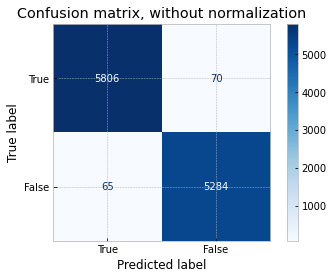

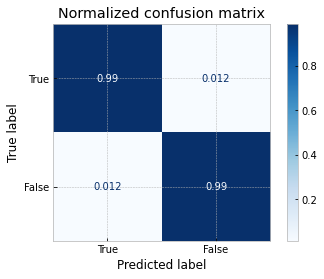

In [ ]:
class_names = ['True', 'False']

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(logistic_regression, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print()
    print(title)
    print(disp.confusion_matrix)

plt.show()

## Random Forest

In [ ]:
# Instantiate model with 30 decision trees
rf = RandomForestClassifier(n_estimators = 30)
# Train the model on training data
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=30)

In [ ]:
# make predictions for test data
y_pred_rf = rf.predict(X_test)
predictions_rf = [round(value) for value in y_pred_rf]
print("RANDOM FOREST: PERFORMANCE METRICS\n\n")

accuracy_rf = accuracy_score(y_test, predictions_rf)
print("Accuracy: %.2f%%" % (accuracy_rf * 100.0))

precision_rf = precision_score(y_test, predictions_rf, average=None)
print("Precision: %.2f%%" % (precision_rf[1] * 100.0))

f1score_rf = f1_score(y_test, predictions_rf, average=None)
print("F1 Score: %.2f%%" % (f1score_rf[1] * 100.0))

recall_rf = recall_score(y_test, predictions_rf, average=None)
print("Recall: %.2f%%" % (recall_rf[1] * 100.0))

RANDOM FOREST: PERFORMANCE METRICS


Accuracy: 98.47%
Precision: 98.72%
F1 Score: 98.39%
Recall: 98.06%


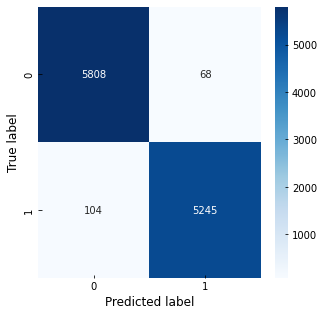

In [ ]:
cm = confusion_matrix(y_test, predictions_rf)
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm, annot = True, fmt =".0f", ax=ax,cmap=plt.cm.Blues)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

In [ ]:
print("Confusion Matrix")
print(cm)

Confusion Matrix
[[5808   68]
 [ 104 5245]]


## Naive Bayes

In [ ]:
# fit the training dataset on the NB classifier
Naive = naive_bayes.GuassianNB()
naive_classifier = Naive.fit(X_train,y_train)

NameError: ignored

In [ ]:
# make predictions for test data
predictions_NB = Naive.predict(X_test)

print("NAIVE BAYES: PERFORMANCE METRICS\n\n")

accuracy_nb = accuracy_score(y_test, predictions_NB)
print("Accuracy: %.2f%%" % (accuracy_nb * 100.0))

precision_nb = precision_score(y_test, predictions_NB, average=None)
print("Precision: %.2f%%" % (precision_nb[1] * 100.0))

f1score_nb = f1_score(y_test, predictions_NB, average=None)
print("F1 Score: %.2f%%" % (f1score_nb[1] * 100.0))

recall_nb = recall_score(y_test, predictions_NB, average=None)
print("Recall: %.2f%%" % (recall_nb[1] * 100.0))

NAIVE BAYES: PERFORMANCE METRICS


Accuracy: 95.23%
Precision: 95.11%
F1 Score: 94.99%
Recall: 94.88%


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)



Confusion matrix, without normalization
[[5615  261]
 [ 274 5075]]

Normalized confusion matrix
[[0.96 0.04]
 [0.05 0.95]]


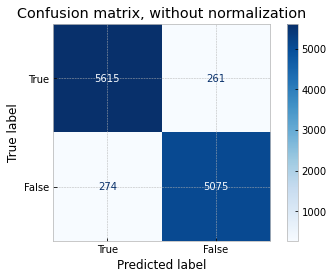

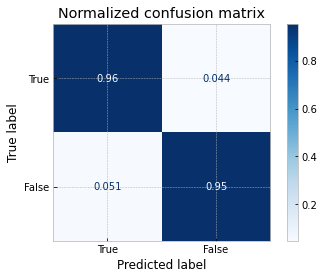

In [ ]:
class_names = ['True', 'False']

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(naive_classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)
    
    print()
    print(title)
    print(disp.confusion_matrix)

plt.show()

## SVM

In [ ]:
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
svm_classifier = SVM.fit(X_train,y_train)

In [ ]:
# make predictions for test data
predictions_SVM = SVM.predict(X_test)

print("SUPPORT VECTOR MACHINES: PERFORMANCE METRICS\n\n")

accuracy_svm = accuracy_score(y_test, predictions_SVM)
print("Accuracy: %.2f%%" % (accuracy_svm * 100.0))

precision_svm = precision_score(y_test, predictions_SVM, average=None)
print("Precision: %.2f%%" % (precision_svm[1] * 100.0))

f1score_svm = f1_score(y_test, predictions_SVM, average=None)
print("F1 Score: %.2f%%" % (f1score_svm[1] * 100.0))

recall_svm = recall_score(y_test, predictions_SVM, average=None)
print("Recall: %.2f%%" % (recall_svm[1] * 100.0))

SUPPORT VECTOR MACHINES: PERFORMANCE METRICS


Accuracy: 99.48%
Precision: 99.33%
F1 Score: 99.46%
Recall: 99.59%


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix, without normalization
[[5840   36]
 [  22 5327]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized confusion matrix
[[0.99 0.01]
 [0.   1.  ]]


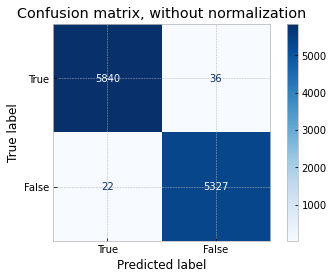

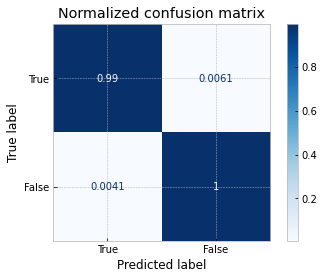

In [ ]:
class_names = ['True', 'False']

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(svm_classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

## Decision Tree

In [ ]:
dt_clf = DecisionTreeClassifier()

dt_clf = dt_clf.fit(X_train,y_train)

In [ ]:
# make predictions for test data
predictions_dt = dt_clf.predict(X_test)

print("DECISION TREE: PERFORMANCE METRICS\n\n")

accuracy_dt = accuracy_score(y_test, predictions_dt)
print("Accuracy: %.2f%%" % (accuracy_dt * 100.0))

precision_dt = precision_score(y_test, predictions_dt, average=None)
print("Precision: %.2f%%" % (precision_dt[1] * 100.0))

f1score_dt = f1_score(y_test, predictions_dt, average=None)
print("F1 Score: %.2f%%" % (f1score_dt[1] * 100.0))

recall_dt = recall_score(y_test, predictions_dt, average=None)
print("Recall: %.2f%%" % (recall_dt[1] * 100.0))

DECISION TREE: PERFORMANCE METRICS


Accuracy: 98.60%
Precision: 98.72%
F1 Score: 98.53%
Recall: 98.34%



Confusion matrix, without normalization
[[5808   68]
 [  89 5260]]

Normalized confusion matrix
[[0.99 0.01]
 [0.02 0.98]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


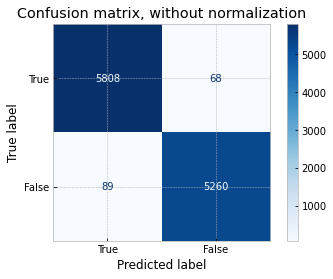

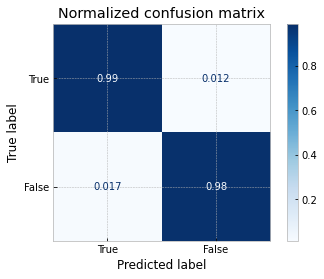

In [ ]:
class_names = ['True', 'False']

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(dt_clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)
    print()
    print(title)
    print(disp.confusion_matrix)

plt.show()

## Comparing the models wrt performance

In [ ]:
var_models = ['Logstic Regression','RF','Naive Bayes','SVM','DT']

var_accuracy = [accuracy_logistic,accuracy_rf,accuracy_nb,accuracy_svm,accuracy_dt]
var_precision = [precision_logistic[1],precision_rf[1],precision_nb[1],precision_svm[1],precision_dt[1]]
var_f1score = [f1score_logistic[1],f1score_rf[1],f1score_nb[1],f1score_svm[1],f1score_dt[1]]
var_recall = [recall_logistic[1],recall_rf[1],recall_nb[1],recall_svm[1],recall_dt[1],]

In [ ]:

metrics = pd.DataFrame({'Models': var_models,'Accuracy': var_accuracy,'Precision': var_precision, 'F1 Score': var_f1score, 'Recall':var_recall})

print("Table of Comparison:\n\n")
metrics 

Table of Comparison:




,Models,Accuracy,Precision,F1 Score,Recall
0,Logstic Regression,0.987973,0.986926,0.987387,0.987848
1,RF,0.984677,0.987201,0.983868,0.980557
2,Naive Bayes,0.952339,0.951087,0.949930,0.948775
3,SVM,0.994833,0.993287,0.994586,0.995887
4,DT,0.986013,0.987237,0.985295,0.983361


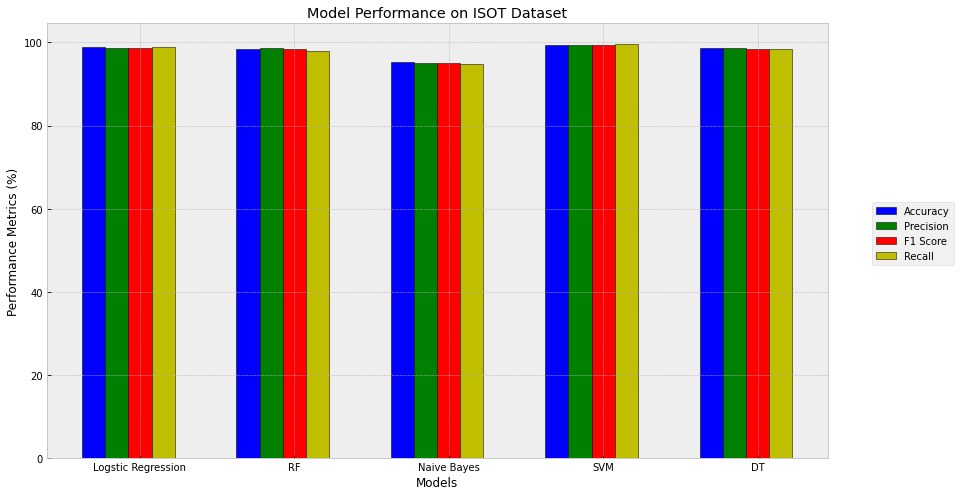

In [ ]:
plt.figure(figsize=(14,8))
n= len(var_models)
r = np.arange(n)
width = 0.15
plt.bar(r, [i*100 for i in var_accuracy], color = 'b',
        width = width, edgecolor = 'black',
        label='Accuracy')
plt.bar(r + width, [i*100 for i in var_precision], color = 'g',
        width = width, edgecolor = 'black',
        label='Precision')
plt.bar(r + width*2,  [i*100 for i in var_f1score], color = 'r',
        width = width, edgecolor = 'black',
        label='F1 Score')
plt.bar(r + width*3,  [i*100 for i in var_recall], color = 'y',
        width = width, edgecolor = 'black',
        label='Recall')

plt.xlabel("Models")
plt.ylabel("Performance Metrics (%)")
plt.title("Model Performance on ISOT Dataset")

plt.xticks(r + width*2,var_models)
plt.legend(bbox_to_anchor = (1.05, 0.6))  
plt.show()